In [15]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
patients = "../data/Пациенты.csv"
norm_dir = "../data/норма"
patology_dir = "../data/патология"

In [3]:
data = pd.read_csv(patients)

In [4]:
data.columns

Index(['ФИО', 'Митральный стеноз', 'Митральная недостаточность',
       'Митральный пролапс', 'Аортальный стеноз', 'Аортальная недостаточность',
       'Стеноз трикуспидального клапана ',
       'Недостаточность трикуспидального клапана',
       'Стеноз клапана легочной артерии',
       'Недостаточность клапана легочной артерии'],
      dtype='object')

In [5]:
data[~data["ФИО"].isna()].loc[:, data.columns != "ФИО"].head(10)

,Митральный стеноз,Митральная недостаточность,Митральный пролапс,Аортальный стеноз,Аортальная недостаточность,Стеноз трикуспидального клапана,Недостаточность трикуспидального клапана,Стеноз клапана легочной артерии,Недостаточность клапана легочной артерии
0,Норма,Норма,Норма,Норма,Норма,Норма,Норма,Норма,Норма
1,Норма,Норма,Норма,Норма,Норма,Норма,Норма,Норма,Норма
2,Норма,Норма,Норма,Норма,Норма,Норма,Норма,Норма,Норма
3,Норма,Норма,Норма,Норма,1 степень,Норма,Норма,Норма,Норма
4,Норма,1 степень,Норма,Норма,Норма,Норма,Норма,Норма,Норма
5,Норма,1 степень,Норма,Норма,Норма,Норма,Норма,Норма,Норма
6,Норма,1 степень,Норма,Норма,Норма,Норма,Норма,Норма,Норма
7,Норма,2 степень,Норма,Норма,Норма,Норма,Норма,Норма,Норма
8,Норма,1 степень,Норма,Норма,1 степень,Норма,Норма,Норма,Норма
9,Норма,1 степень,Норма,Норма,Норма,Норма,1 степень,Норма,Норма


конфиденциальная информация - ФИО пациентов, она не будет видна при работе алгоритма, будет использоваться в исследованиях только для соответствия аудио данных к значениям классов

In [6]:
def find_wav_files(directory):
    wav_files = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                wav_files.append(os.path.join(root, file))

    return wav_files

Основные статистики:
        duration  sample_rate
count  51.000000         51.0
mean   48.170090      22050.0
std     6.026958          0.0
min    37.627302      22050.0
25%    45.110204      22050.0
50%    47.739864      22050.0
75%    50.901973      22050.0
max    68.835193      22050.0


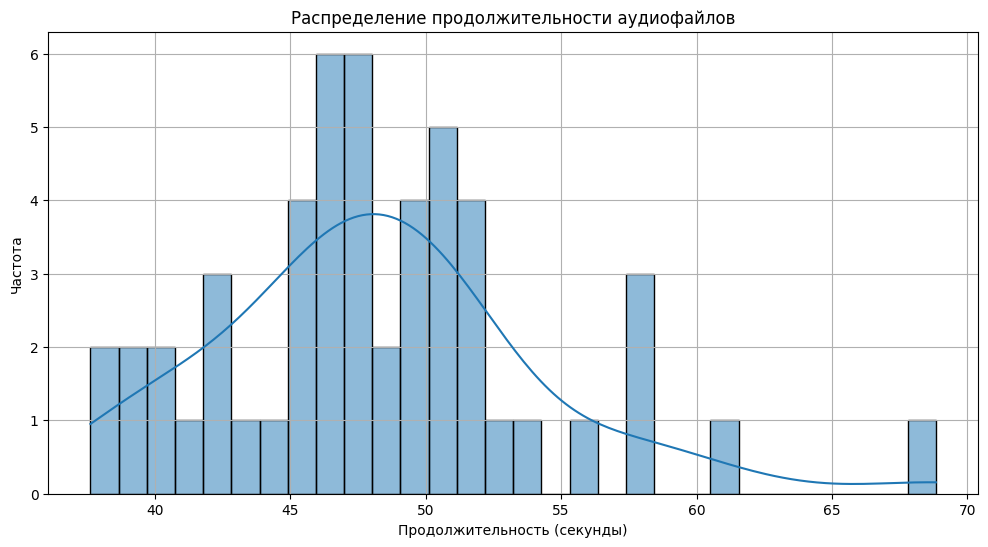

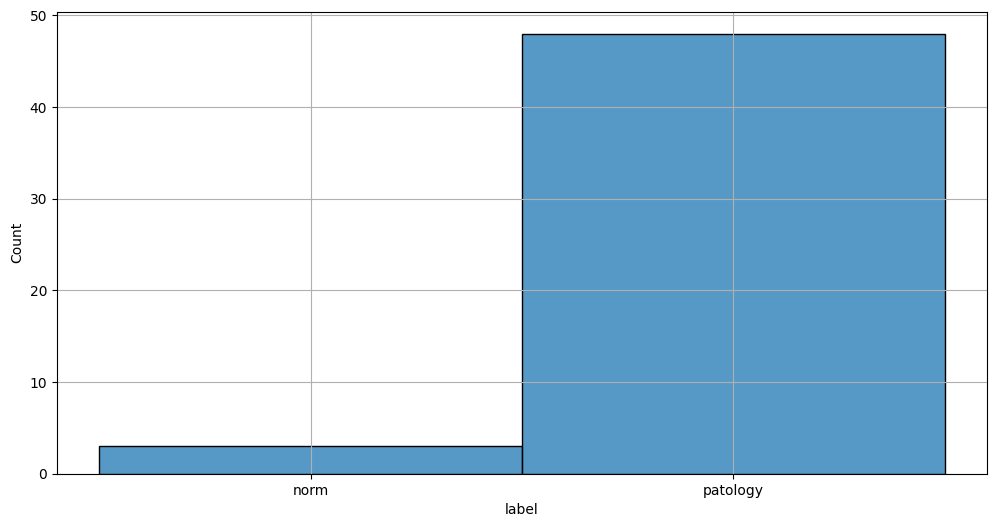

In [19]:
audio_paths = find_wav_files(norm_dir)
norm = len(audio_paths)
audio_paths.extend(find_wav_files(patology_dir))
patology = len(audio_paths) - norm

data = {
    "file_name": [],
    "duration": [],
    "sample_rate": [],
    "label": ["norm"] * norm + ["patology"] * patology,
}

for file in audio_paths:

    y, sr = librosa.load(file, sr=None)  # sr=None сохраняет оригинальную частоту дискретизации

    duration = librosa.get_duration(y=y, sr=sr)

    data["file_name"].append(file.split("/")[-1])
    data["duration"].append(duration)
    data["sample_rate"].append(sr)

df = pd.DataFrame(data)

print("Основные статистики:")
print(df.describe())

# Распределение продолжительности аудио
plt.figure(figsize=(12, 6))
sns.histplot(df["duration"], bins=30, kde=True)
plt.title("Распределение продолжительности аудиофайлов")
plt.xlabel("Продолжительность (секунды)")
plt.ylabel("Частота")
plt.grid()
plt.show()

# Баланс классов
plt.figure(figsize=(12, 6))
sns.histplot(df["label"], bins=10)
plt.grid()
plt.show()